# Task-05

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

# About Dataset

**Description**

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.

Dataset available here: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

 # Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
df = pd.read_csv(r"C:\practice\US_Accidents_March23.csv")

In [3]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


# Information about the dataframe

In [4]:
df.shape

(500000, 46)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,500000.0,2.212748,0.486661,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,500000.0,36.206421,5.071411,24.562117,33.416823,35.832147,40.082443,48.999569
Start_Lng,500000.0,-94.736583,17.405761,-124.497420,-117.233047,-87.794365,-80.359601,-67.484130
End_Lat,279623.0,36.273192,5.265333,24.570110,33.474773,36.192669,40.181341,48.998901
End_Lng,279623.0,-95.776553,18.120211,-124.497419,-117.778324,-88.039013,-80.252449,-67.484130
Distance(mi),500000.0,0.564317,1.774872,0.000000,0.000000,0.029000,0.465000,193.479996
Temperature(F),489534.0,61.646254,19.000133,-77.800000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),370983.0,58.229028,22.352246,-53.200000,43.000000,62.000000,75.000000,207.000000
Humidity(%),488870.0,64.834921,22.826158,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),491072.0,29.536621,1.008666,0.120000,29.370000,29.860000,30.030000,38.440000


In [8]:
df.describe(include=object)

,ID,Source,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,500000,500000,500000,500000,499999,499309,499981,500000,500000,499884,500000,499493,498554,492326,488803,488899,498517,498517,498517,498517
unique,500000,3,487027,493821,408146,88272,9488,1606,49,127804,1,4,1878,255623,24,108,2,2,2,2
top,A-1675052,Source1,2021-01-26 16:16:13,2021-11-22 08:00:00,A crash has occurred causing no to minimum del...,I-95 N,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2022-03-13 01:53:00,CALM,Fair,Day,Day,Day,Day
freq,1,279623,20,11,592,4973,12141,34247,113274,720,500000,231397,7756,92,62259,166053,344967,368274,392866,412242


# Checking for null/missing values in the dataset

In [9]:
df.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

# Dropping the columns with huge number of null values

In [10]:
df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)

In [11]:
# Storing categorical column names to a new variable
categorical = [i for i in df.columns if df[i].dtype == 'O']

# For categorical values, we can replace null values with the mode of each column
for i in categorical:
    df.loc[:, i] = df[i].fillna(df[i].mode()[0])


In [12]:
df.drop(columns=['Wind_Speed(mph)', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)'], axis=1, inplace=True)

In [13]:
df.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
d

# Checking for duplicate values

In [14]:
df.duplicated().sum()

np.int64(0)

# EDA
# City with most Number of accidents

In [15]:
city_acc = df['City'].value_counts().sort_values(ascending = False).reset_index()

In [16]:
city_acc

,City,count
0,Miami,12160
1,Houston,11031
2,Los Angeles,10299
3,Charlotte,8979
4,Dallas,8245
...,...,...
9483,Ranger,1
9484,Grantham,1
9485,Fair Haven,1
9486,Fleming,1


# Top 10 cities with most number of accidents

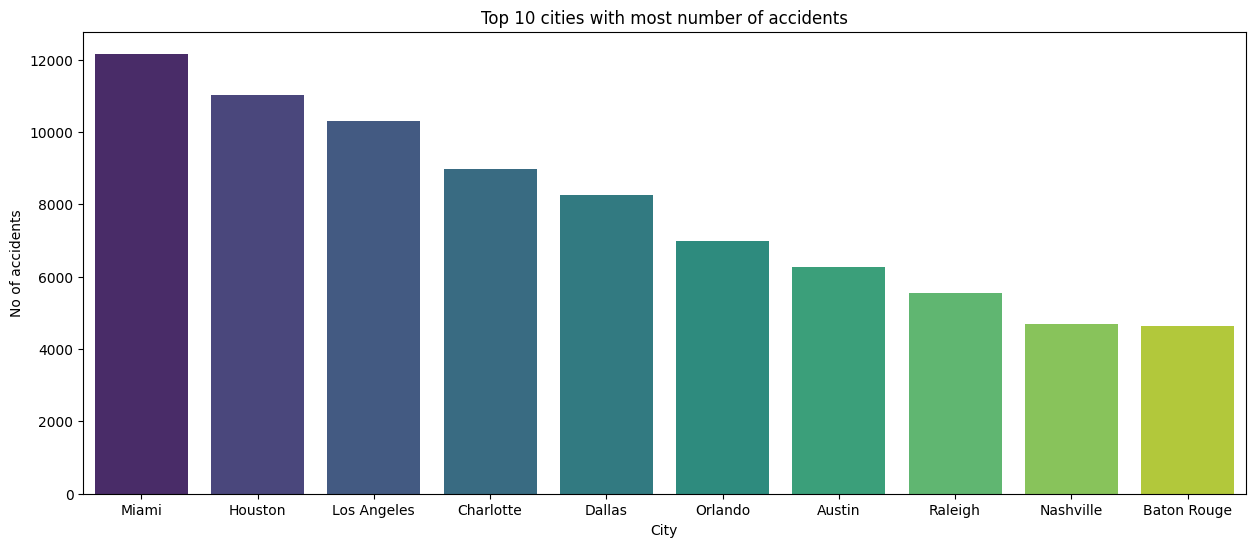

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.head(10), hue='City',palette='viridis', legend=False)
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

# Bottom 10 cities with least number of accidents

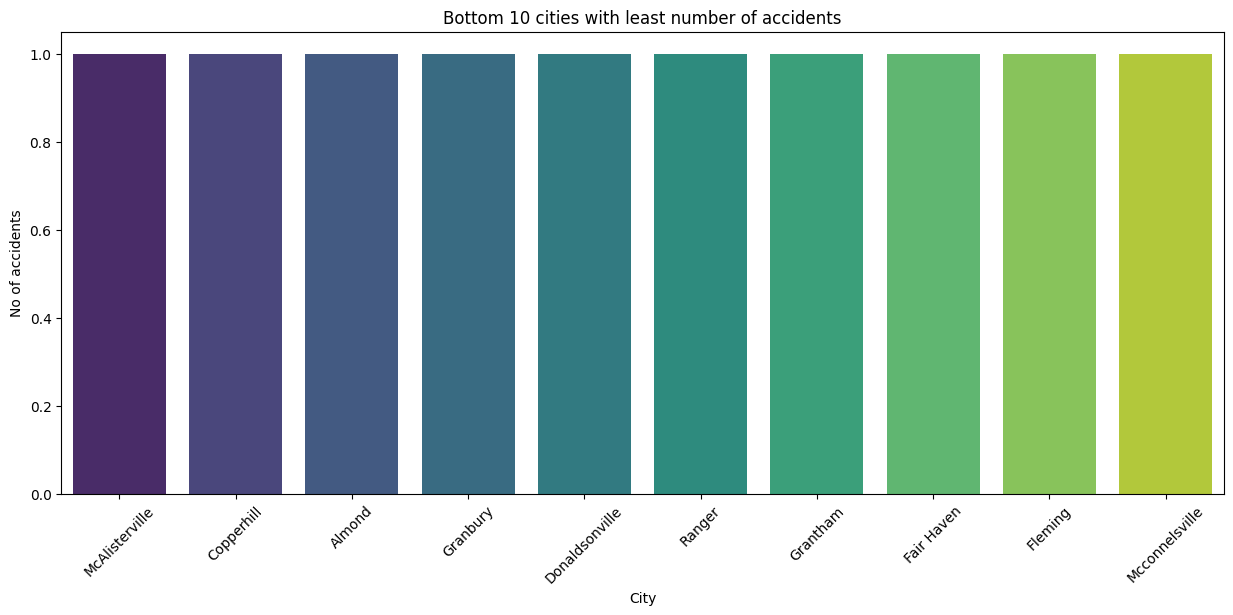

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.tail(10), hue='City', palette='viridis', legend=False)
plt.title("Bottom 10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()

# State with most and least Number of accidents

In [19]:
state_acc = df['State'].value_counts().sort_values(ascending = False).reset_index()
state_acc

,State,count
0,CA,113274
1,FL,56710
2,TX,37355
3,SC,24737
4,NY,22594
5,NC,21750
6,VA,19515
7,PA,19351
8,MN,12333
9,OR,11559


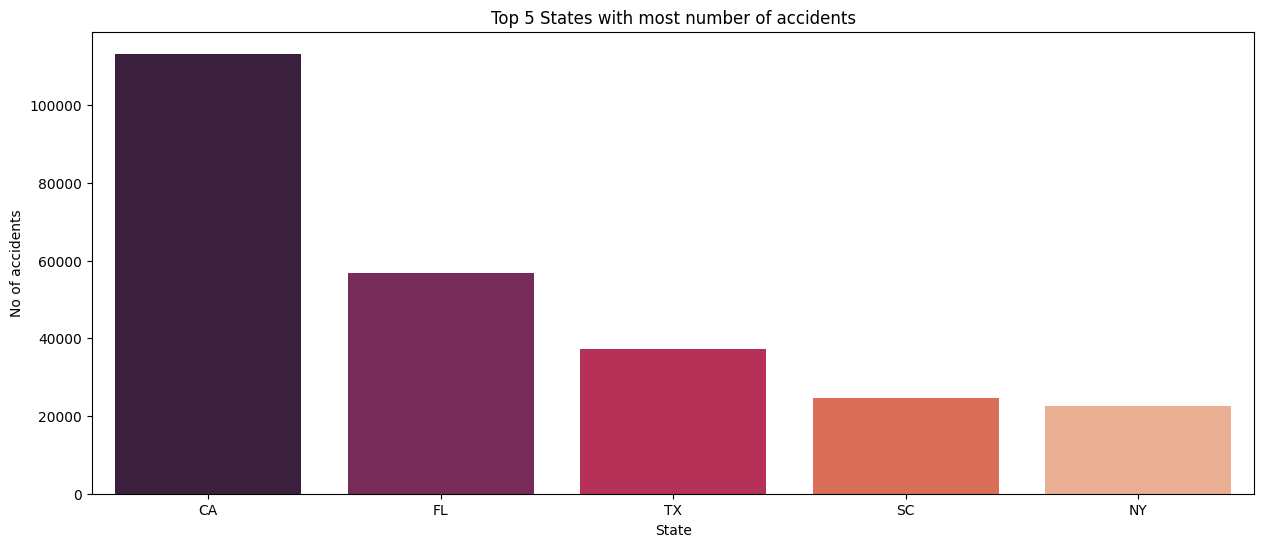

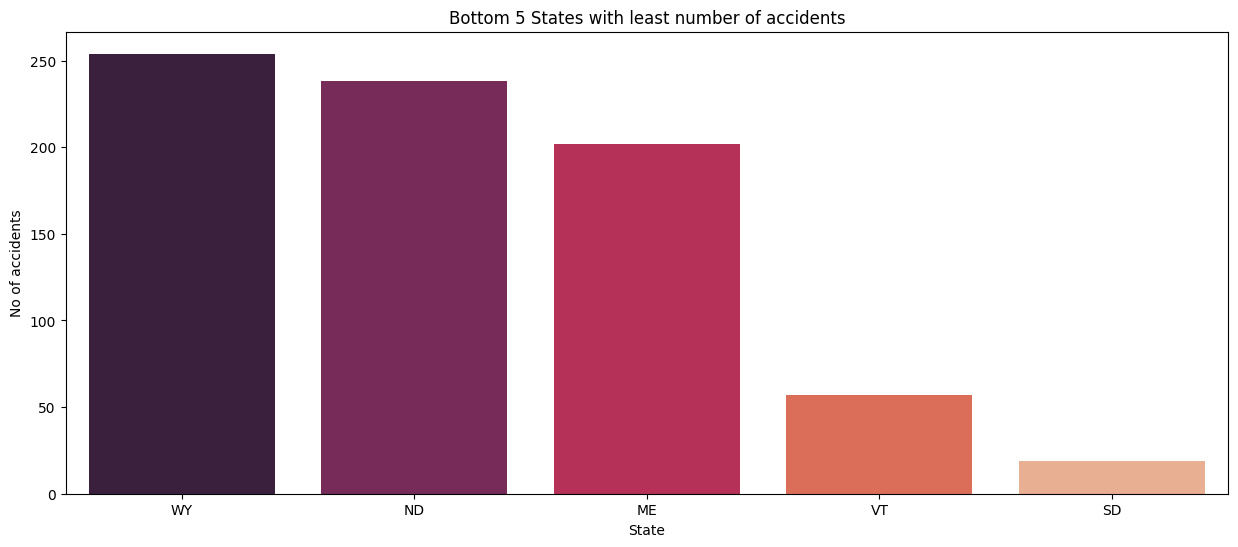

In [20]:
## States with most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.head(5), hue='State', palette='rocket', legend=False)
plt.title("Top 5 States with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

## States with the least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.tail(5), hue='State', palette='rocket', legend=False)
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("No of accidents")
plt.show()

In [21]:
df['Severity'].value_counts().index

Index([2, 3, 4, 1], dtype='int64', name='Severity')

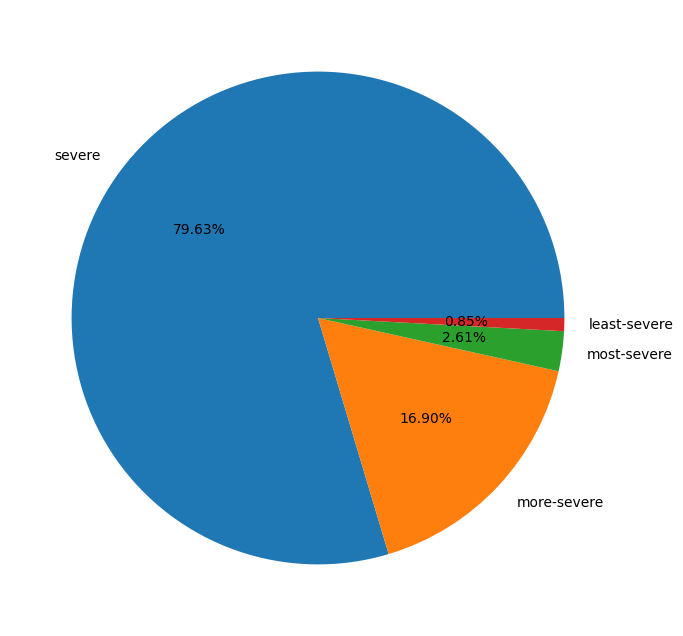

In [22]:
plt.figure(figsize=(8,8))
plt.pie(df['Severity'].value_counts(),labels=['severe','more-severe','most-severe','least-severe'],autopct="%1.2f%%")
plt.show()

In [23]:
# Convert the 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the year from the 'Start_Time' column and store it in a new column called 'Year'
df['Year'] = df['Start_Time'].dt.year

# Display the first few rows to verify
print(df[['Start_Time', 'Year']].head())

           Start_Time    Year
0 2019-06-12 10:10:56  2019.0
1                 NaT     NaN
2                 NaT     NaN
3 2022-02-21 17:43:04  2022.0
4 2020-12-04 01:46:00  2020.0


In [24]:
df['Year'].value_counts()

Year
2021.0    91941
2022.0    81695
2020.0    75019
2019.0    61852
2018.0    57578
2017.0    46452
2016.0    26663
2023.0    10637
Name: count, dtype: int64

# Years with most number of accidents

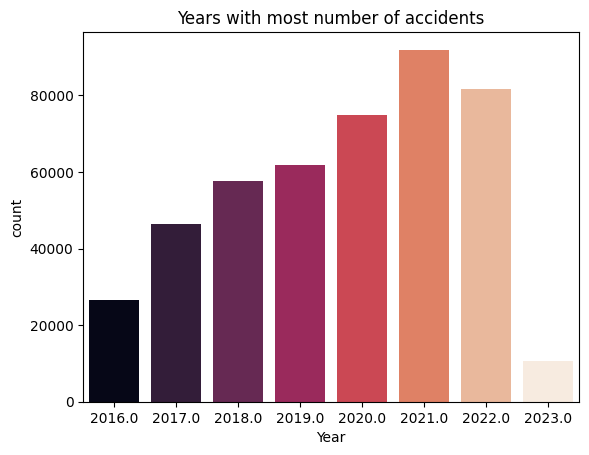

In [25]:
year_count = df['Year'].value_counts().reset_index()
sns.barplot(x='Year',y='count',data=year_count, hue='Year', palette='rocket', legend=False)
plt.title("Years with most number of accidents")
plt.show()

# histogram to show the distribution of accidents through the time zones

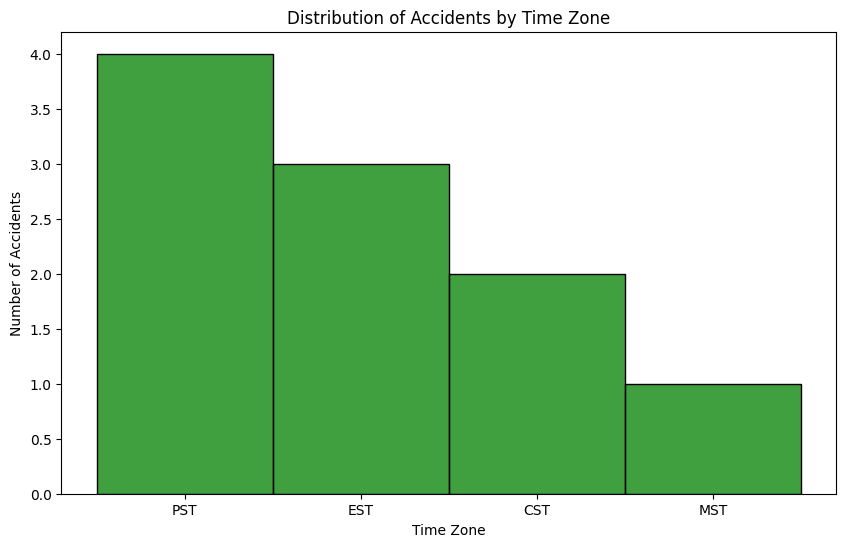

In [28]:
data = {'Time_Zone': ['PST', 'EST', 'CST', 'PST', 'EST', 'CST', 'PST', 'MST', 'PST', 'EST']}
df = pd.DataFrame(data)

# Filter your data (if needed, adjust the filtering logic based on your actual dataset)
filtered_df = df[df['Time_Zone'].isin(['PST', 'EST', 'CST', 'MST'])]  # Example filter

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Time_Zone'], bins=4, kde=False, color='green')
plt.xlabel('Time Zone')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Time Zone')
plt.show()


# Weather conditions at the time of accidents

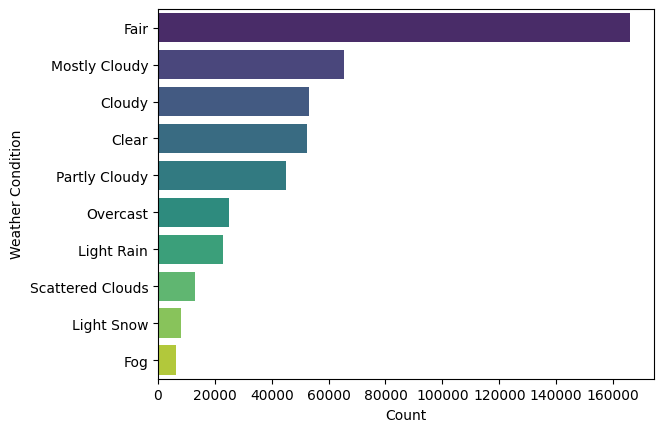

In [42]:
df = pd.read_csv(r"C:\practice\US_Accidents_March23.csv")
# Ensure the 'Weather_Condition' column exists and is not empty
if 'Weather_Condition' in df.columns:
    # Drop rows with NaN values in 'Weather_Condition' and count the occurrences
    weather = df[['Weather_Condition']].dropna()
    weather = weather['Weather_Condition'].value_counts().reset_index()
    weather.columns = ['Weather_Condition', 'count']  # Rename columns for clarity

    # Plot the top 10 weather conditions
    sns.barplot(x='count', y='Weather_Condition', data=weather[:10], hue='Weather_Condition', orient='horizontal', palette='viridis', legend=False)
    plt.xlabel('Count')
    plt.ylabel('Weather Condition')
    plt.show()
else:
    print("'Weather_Condition' column does not exist in the DataFrame!")


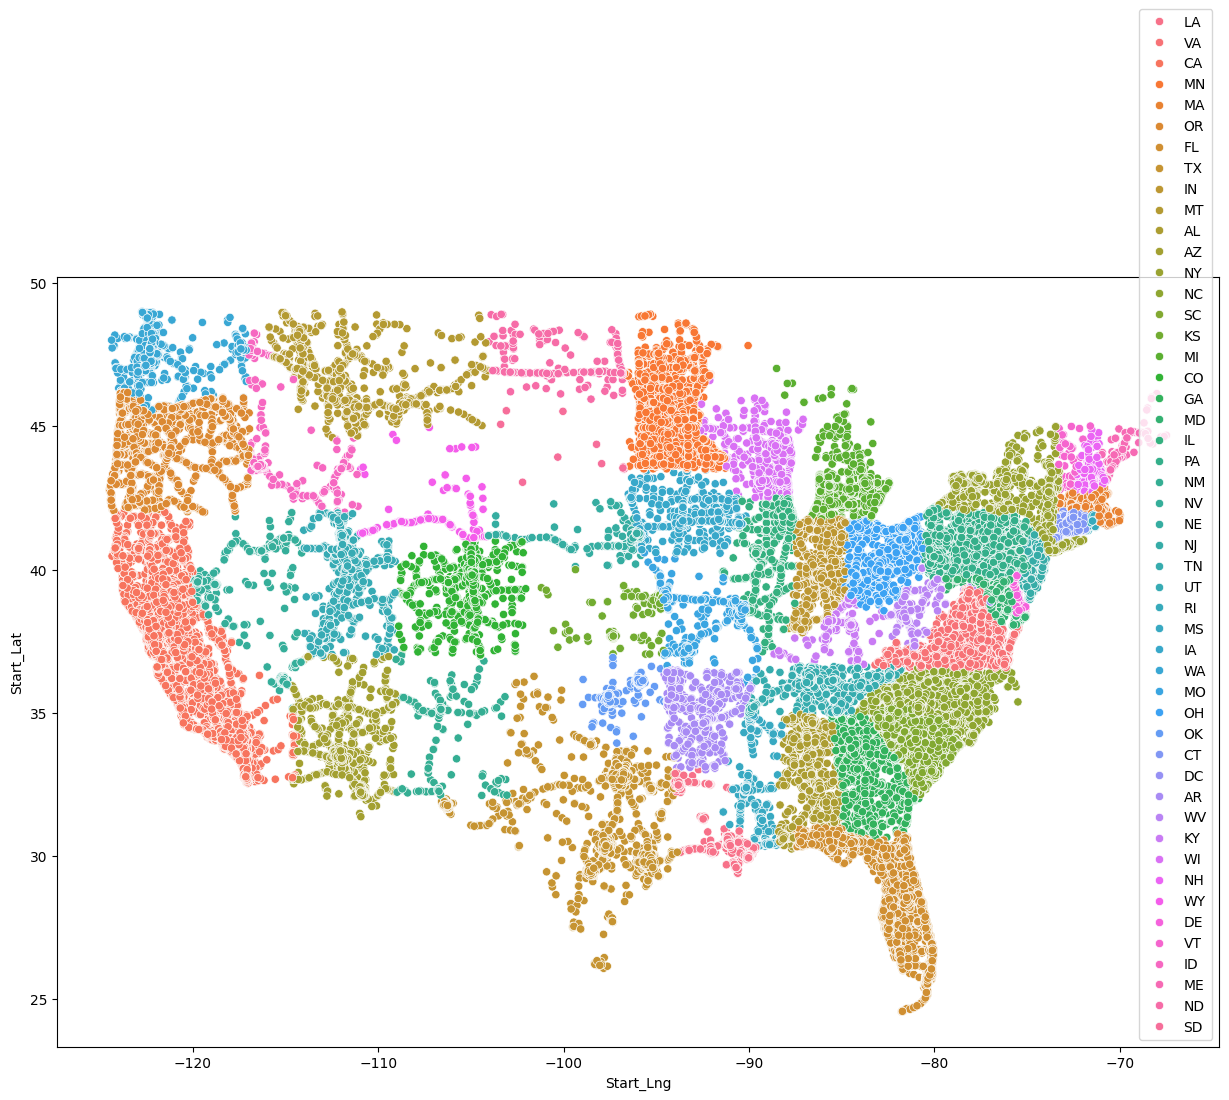

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['State'])
plt.legend(loc="lower right")
plt.show()

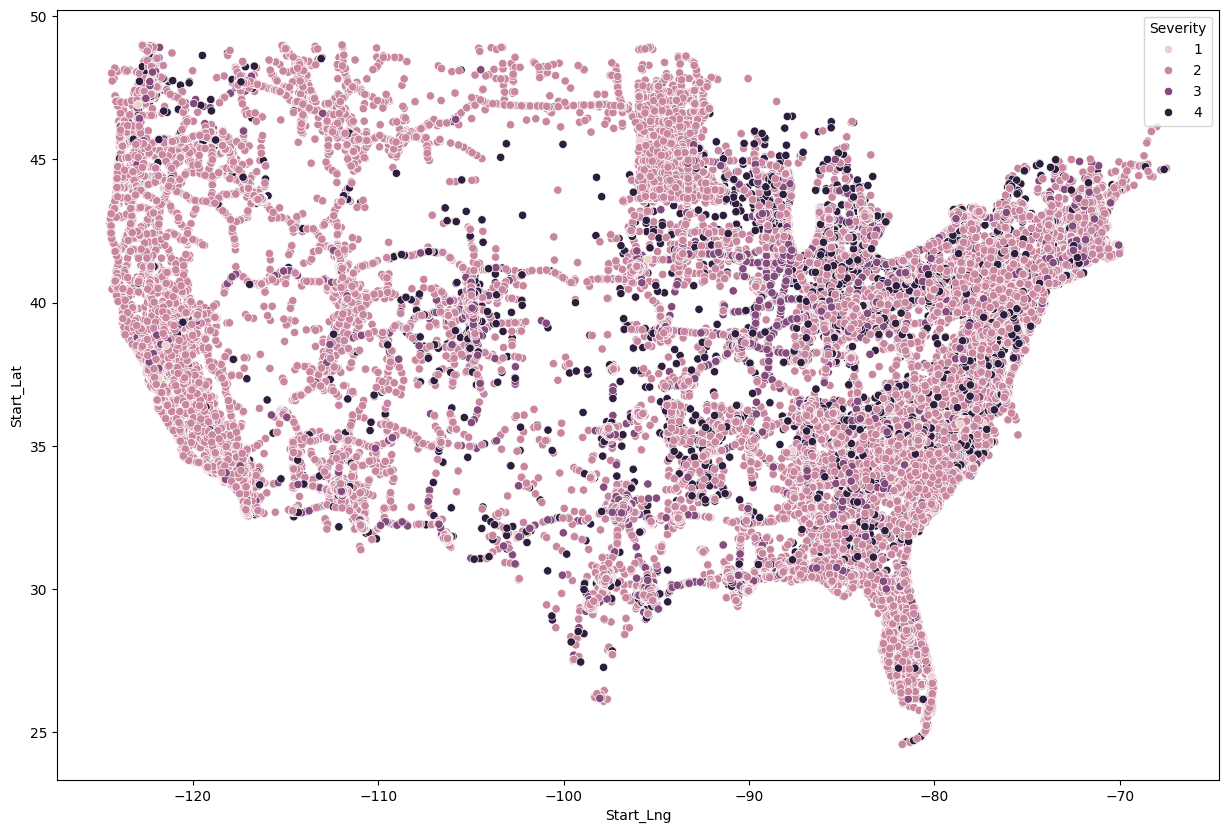

In [44]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['Severity'])
plt.show()